### ***Fuente de la Competición: https://www.drivendata.org/competitions/44/dengai-predicting-disease-spread/***

# ***Explicación del problema***

Conjunto de datos de dos ciudades y el número de **casos de infección** relacionadas con el Dengue. Se incluyen los siguientes datos.


***Datos de ciudad y fecha:***

- city: ciudad
- year: año
- week_start_date: Semana del año
- total_cases: casos totales de infección con Dengue

***Datos climáticos diarios de la estaciones del "NOAA's GHCN" (Global Historical Climatology Network daily)***

- station_max_temp_c: Máxima temperatura
- station_min_temp_c: Mínima temperatura
- station_avg_temp_c: Temperatura Media
- station_precip_mm: Precipitaciones totales
- station_diur_temp_rng_c: Rango de temperaturas diurno

***Medida de precipitaciones del satélite PERSIANN***

- precipitation_amt_mm: Precipitaciones Totales

***Medidas reanalizadas del "NOAA's NCEP" (National Centers for Environmental Prediction)***

- reanalysis_sat_precip_amt_mm: Precipitaciones totales
- reanalysis_dew_point_temp_k:  Temperatura media del punto de rocío
- reanalysis_air_temp_k: Temperatura media del aire
- reanalysis_relative_humidity_percent: Media relativa de la humedad
- reanalysis_specific_humidity_g_per_kg: Media específica de la humedad
- reanalysis_precip_amt_kg_per_m2: Precipitaciones totales por metro cuadrado
- reanalysis_max_air_temp_k: Temperatura máxima del aire
- reanalysis_min_air_temp_k: Temperatura mínima del aire
- reanalysis_avg_temp_k: Temperatura media del aire
- reanalysis_tdtr_k: Rango de temperaturas diurnas

***Medidas de los índices de vegetación normalizado del "NOAA's CDR" (Climate Data Records)***

- ndvi_se: Píxel SurEste del centro geográfico de la ciudad
- ndvi_sw: Píxel SurOeste del centro geográfico de la ciudad
- ndvi_ne: Píxel NorEste del centro geográfico de la ciudad
- ndvi_nw: Píxel NorOeste del centro geográfico de la ciudad


**Aclaración:** NDVI significa una medicion de lo "verde" en las imágenes. Oscila entre -1 y 1. 
· 1 significa totalmente verde. 
· 0 significa poco o nada verde (que podría indicar urbanismo o terrenos sin vegetación). 
· -1 significa agua.


***Los Datos ya vienen separados en 3 CSV***

- train_features.csv > Características para entrenar
- train_labels.csv > Etiquetas de entrenamiento
- test_features.csv > Características para testear

***Se requiere generar un modelo de regresión que analice y prediga el número de casos (total_cases), y se genere un archivo .csv que recoja los resultados para ser enviado a la página de la competición.***

**Este archivo será el submission_format.csv que ya nos entregan en la competición**

# ***Carga de Datos***

In [3]:
import pandas as pd
import io

url_Train_Labels = "https://raw.githubusercontent.com/Marc-Haze/Data-Analysis/main/Competition_DengAI/dengue_labels_train.csv"
url_Train_Features = "https://raw.githubusercontent.com/Marc-Haze/Data-Analysis/main/Competition_DengAI/dengue_features_train.csv"
url_Test_Features = "https://raw.githubusercontent.com/Marc-Haze/Data-Analysis/main/Competition_DengAI/dengue_features_test.csv"

Y_Train = pd.read_csv(url_Train_Labels)
X_Train = pd.read_csv(url_Train_Features)
X_Test = pd.read_csv(url_Test_Features)

In [4]:
X_Train.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [ ]:
X_Train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 1990 to 2010
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   city                                   1456 non-null   object 
 1   weekofyear                             1456 non-null   int64  
 2   week_start_date                        1456 non-null   object 
 3   ndvi_ne                                1262 non-null   float64
 4   ndvi_nw                                1404 non-null   float64
 5   ndvi_se                                1434 non-null   float64
 6   ndvi_sw                                1434 non-null   float64
 7   precipitation_amt_mm                   1443 non-null   float64
 8   reanalysis_air_temp_k                  1446 non-null   float64
 9   reanalysis_avg_temp_k                  1446 non-null   float64
 10  reanalysis_dew_point_temp_k            1446 non-null   float64
 11  r

In [ ]:
Y_Train.head()

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6


In [ ]:
Y_Train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 1990 to 2010
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   city         1456 non-null   object
 1   weekofyear   1456 non-null   int64 
 2   total_cases  1456 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 45.5+ KB


In [ ]:
X_Test.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,2008,18,2008-04-29,-0.0189,-0.018900,0.102729,0.091200,78.60,298.492857,...,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1,sj,2008,19,2008-05-06,-0.0180,-0.012400,0.082043,0.072314,12.56,298.475714,...,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
2,sj,2008,20,2008-05-13,-0.0015,NaN,0.151083,0.091529,3.66,299.455714,...,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0
3,sj,2008,21,2008-05-20,NaN,-0.019867,0.124329,0.125686,0.00,299.690000,...,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3
4,sj,2008,22,2008-05-27,0.0568,0.039833,0.062267,0.075914,0.76,299.780000,...,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1


In [ ]:
X_Test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 416 entries, 2008 to 2013
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   city                                   416 non-null    object 
 1   weekofyear                             416 non-null    int64  
 2   week_start_date                        416 non-null    object 
 3   ndvi_ne                                373 non-null    float64
 4   ndvi_nw                                405 non-null    float64
 5   ndvi_se                                415 non-null    float64
 6   ndvi_sw                                415 non-null    float64
 7   precipitation_amt_mm                   414 non-null    float64
 8   reanalysis_air_temp_k                  414 non-null    float64
 9   reanalysis_avg_temp_k                  414 non-null    float64
 10  reanalysis_dew_point_temp_k            414 non-null    float64
 11  re

***IMPORTACIONES***

In [5]:
# Manipulación y visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

***Comprobar si existen datos Null, NaN o Infinite en los datos***

In [10]:
null_check = X_Train.isnull().values.any()
nan_check = X_Train.isna().values.any()
inf_check = X_Train.isin([np.inf, -np.inf]).values.any()

print('¿Hay datos Null en X_Train?:', null_check )
print('¿Hay datos Nan en X_Train?:', nan_check )
print('¿Hay datos Infinitos en X_Train?:', inf_check )

¿Hay datos Null en X_Train?: False
¿Hay datos Nan en X_Train?: False
¿Hay datos Infinitos en X_Train?: False


In [7]:
null_check = Y_Train.isnull().values.any()
nan_check = Y_Train.isna().values.any()
inf_check = Y_Train.isin([np.inf, -np.inf]).values.any()

print('¿Hay datos Null en Y_Train?:', null_check )
print('¿Hay datos Nan en Y_Train?:', nan_check )
print('¿Hay datos Infinitos en Y_Train?:', inf_check )

¿Hay datos Null en Y_Train?: False
¿Hay datos Nan en Y_Train?: False
¿Hay datos Infinitos en Y_Train?: False


In [11]:
null_check = X_Test.isnull().values.any()
nan_check = X_Test.isna().values.any()
inf_check = X_Test.isin([np.inf, -np.inf]).values.any()

print('¿Hay datos Null en test_data?:', null_check )
print('¿Hay datos Nan en test_data?:', nan_check )
print('¿Hay datos Infinitos en test_data?:', inf_check )

¿Hay datos Null en test_data?: False
¿Hay datos Nan en test_data?: False
¿Hay datos Infinitos en test_data?: False


In [9]:
# Existen valores NaN y Null, así que rellenaremos dichos datos
X_Train.fillna(X_Train.rolling(20, min_periods=1).mean(), inplace=True)
X_Test.fillna(X_Test.rolling(20, min_periods=1).mean(), inplace=True)

# ***Matriz de Correlación para comprobar los datos***

<AxesSubplot:>

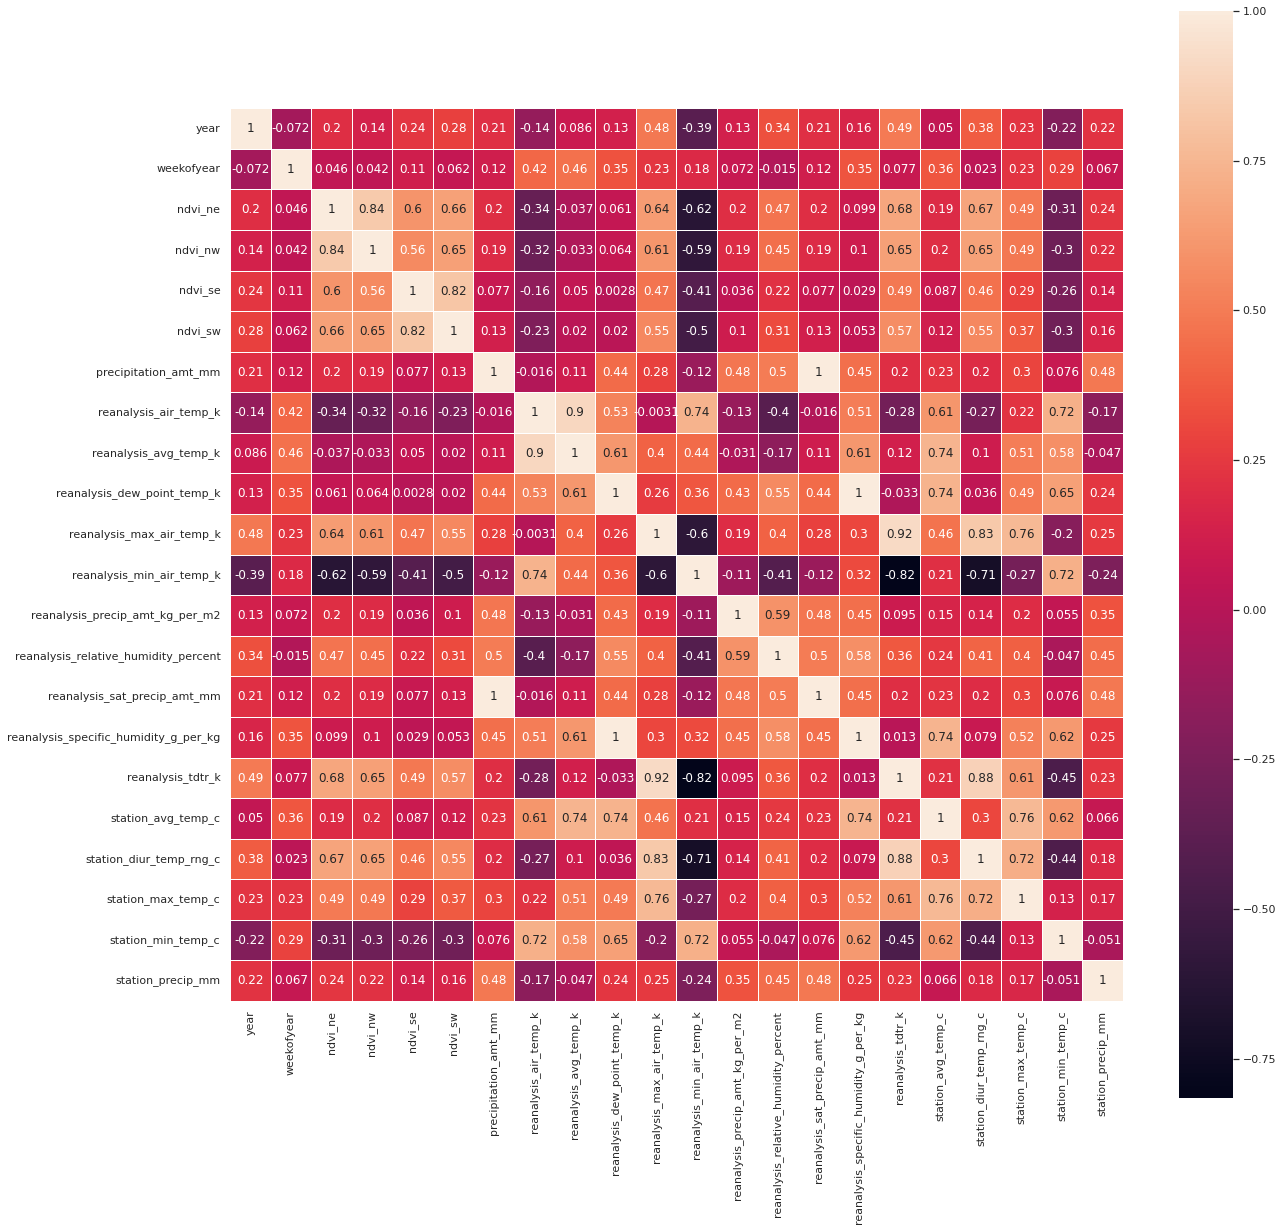

In [ ]:
# Se utiliza la librería Seaborn descargada más arriba
sns.set()
fig, ax = plt.subplots(figsize=(20,20))  # Manipular el tamaño del Mapa
sns.heatmap(X_Train.corr(), square=True, annot=True, linewidths=.5, ax=ax)

# ***Transformaciones de los Datos***

***Convertiremos la variable 'city' a numérica***

- 'sj' (San Juan) será convertida a 0
- 'iq' (Iquitos) será convertida a 1

In [12]:
X_Train['city'].replace(['sj','iq'],[0,1],inplace=True)
X_Test['city'].replace(['sj','iq'],[0,1],inplace=True)

***Eliminaremos la columna 'week_start_date'***

In [13]:
X_Train = X_Train.drop('week_start_date',axis=1)
X_Test = X_Test.drop('week_start_date',axis=1)

# ***Selección del Modelo: KNN con Cross Validation***

***Repartición de los datos de entrenamiento***

In [14]:
# Separamos datos de entrada y salida
Y_Train = Y_Train['total_cases']

# Separamos en Train y Test los datos en un porcentaje del 25% para los tipo Test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_Train, Y_Train, test_size=0.2)

***El modelo seleccionado será KNN con Cross Validation, identificando cual es el número de vecinos para el que nuestro modelo obtiene el mejor resultado.***

Min Value uniform : 18.84931506849315 (7)
Min Value distance : 18.838830473669862 (7)


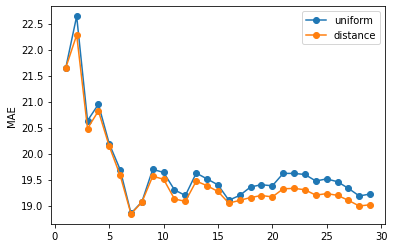

In [19]:
from sklearn import neighbors
from sklearn.model_selection import TimeSeriesSplit
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
import numpy as np

cv = TimeSeriesSplit(n_splits = 5)
X_Train.reset_index(drop=True,inplace=True) 

for i, weights in enumerate(['uniform', 'distance']):
   total_scores = []
   for n_neighbors in range(1,30):
       fold_accuracy = []
       knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
       # verificar cada uno de los modelos con validación cruzada.
       for train_fold, test_fold in cv.split(X_Train):
          # División train test aleatoria
          f_train = X_Train.loc[train_fold]
          f_test = X_Train.loc[test_fold]
          # entrenamiento y ejecución del modelo
          knn.fit(X_train, Y_train)
          Y_Pred = knn.predict(X_test)
          # evaluación del modelo
          mae = mean_absolute_error(Y_test,Y_Pred)
          fold_accuracy.append(mae)
       total_scores.append(sum(fold_accuracy)/len(fold_accuracy))
   
   plt.plot(range(1,len(total_scores)+1), total_scores, 
             marker='o', label=weights)
   print ('Min Value ' +  weights + " : " +  str(min(total_scores)) +" (" + str(np.argmin(total_scores) + 1) + ")")
   plt.ylabel('MAE')      
    
plt.legend()
plt.show()

# Recojemos nuestro número de vecinos que ha dado el MAE más bajo para entrenar
best_value = np.argmin(total_scores) + 1 

# ***Selección de Modelo y fase de entrenamiento***

In [21]:
# Escogemos modelo
model = neighbors.KNeighborsRegressor(best_value)

# Entrenamos el modelo
model.fit(X_Train, Y_Train)

# Predicción con los datos de Tipo Test
Y_Pred = model.predict(X_Test)

In [30]:
print(f"Predicciones: {Y_Pred.astype(int)}")

Predicciones: [ 8  8  8  7 12 33  4 19 10 25 17 12 15 31 42 19 30 16 34 65 26 23 67 44
 35 36 18 34 38 74 18 16 16 24 16 35 13  9 13 13  6 11  7  6 17 16  5  8
  4  7  5  7 14  9 13 22 18  5 16  4  4 40 25 15 11 28 36 10 21 32 32 37
  4 20 32 65 21 36 45 15 14 29 27 20 18 20 20 36 11 13 11  9  8  9 12  7
 11 24 10  9  6 10  4  9 14  7 12 31 13 26 20 18 43 23 11 76  9 36 38 26
 39 59 37 23 28 44 32 48 12 23 21 28 37 35 18 17 13 21 17 28 14 15  8 13
 13  9 11 12  9 10  5  4 12  6  6  6  6  9 10  4  4 26 31  5 12 13 43 33
  2 10 13 37 36  8  3 30 16 63 15 35 12 60 80 27 51 21 36 77 12 21 19 27
 13 12 13 11 14 13  9 10 10 12  5  6 13 16  7 15  6  8  9  8 10 10 12 11
 27 11 16 10 40 19 42 15 19 36 11 20 15 58 51 26 38 46 25 23 42 43 28 41
 80 29 19  8 11  6  9  9 10 13  9 11  5  5  4  6 23  6  4 15  4  3 13  3
  4  4  7 13  4 15 14 15 10  7  7 18 16 10 28  4 25 33  7 11 12 17  7 20
  6 14 20  6  5  5 14  7 12  6  6  6  6  6  6  5  5  2  7 24  3  8 15  2
  9  5 10 15 31  6 55  3 30 13  2 13 

# ***Añadir los Resultados al CSV a enviar a la competición***

In [31]:
from google.colab import files
url_submission_format = "https://raw.githubusercontent.com/Marc-Haze/Data-Analysis/main/Competition_DengAI/submission_format.csv"

  
results = pd.read_csv(url_submission_format)
results['total_cases'] = Y_Pred.astype(int)

results.to_csv('Dengue_Results.csv', index=False)
files.download('Dengue_Results.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# ***Resultados y observaciones***

***Resultados en el CSV***

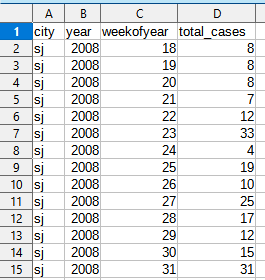

***Resultados de la competición para el primer Submit***

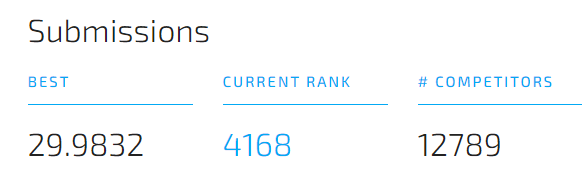

***Observaciones***

Hemos sacado un buen progreso en la competición solo con esta primera prueba, sin realizar demasiadas transformaciones y yendo directo al entrenamiento con una primera idea de modelo, por lo que se espera una considerable bajada en las próximas versiones cuando se compruebe y se realicen otras transformaciones.